In [1]:
import numpy as np
import matplotlib
matplotlib.use('TkAgg')

import matplotlib.pyplot as plt
%matplotlib inline

import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.plots as plots

In [8]:
opsdb = db.OpsimDatabase('baseline2018a.db')
outDir = 'outDir'
resultsDb = db.ResultsDb(outDir=outDir)

In [3]:
class EvaluateAliasing(metrics.BaseMetric):
    """Measure the aliasing produced by a group of measurement of a given frequency, provide a clue for reducing the aliasing 
    in the future observations. Frequency input in Hertz"""
    
    def __init__(self, frequency, **kwargs):
        super(EvaluateAliasing, self).__init__(col='observationStartMJD', **kwargs)
        self.freq = frequency
        
    def run(self, dataSlice, slicePoint=None):
        
        ColumnName = 'observationStartMJD'
        
        # Convert the given frequency to period in day.
        T = 1 / self.freq
        TInDay = T / 86400
        
        # Take the mod of the measurement time, and convert to phase. 
        ModTime = np.mod(dataSlice[ColumnName], TInDay)
        ModTimePhase = ModTime * 2 * np.pi / TInDay
        
        # Decompose to x and y directions and take an average.
        XComponent = np.cos(ModTimePhase)
        YComponent = np.sin(ModTimePhase)
        
        XComponentNet = np.mean(XComponent)
        YComponentNet = np.mean(YComponent)
        
        # Calculate the amplitude. 
        Amplitude = (XComponentNet**2 + YComponentNet**2)**0.5
        
        return Amplitude

Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint night<30 and proposalId=3 for columns ['fieldDec', 'fieldRA', 'observationStartMJD']
Found 18030 visits
Running:  ['Aliasing']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night<30 and proposalId=3" constraint now.
monopole: 1.00247  dipole: lon: -166.267, lat: 20.144, amp: 0.0340011
Plotting complete.


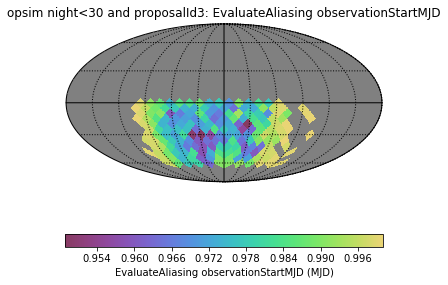

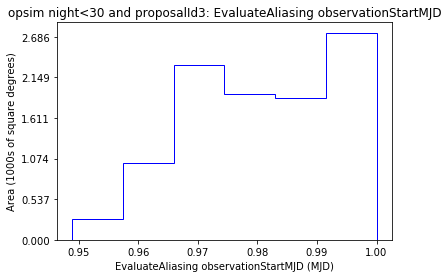

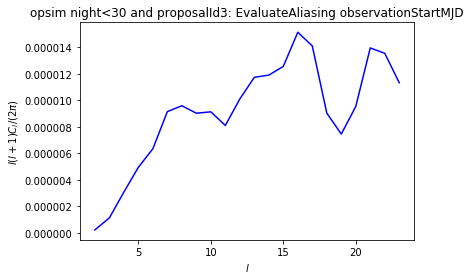

In [6]:
# Some tests below.

# Set the frequency to 1/day
m = EvaluateAliasing(11.574 * 10**-6)
Slicer = slicers.HealpixSlicer(nside=8)
Sqlconstraint = 'night<30 and proposalId=3'

mb = metricBundles.MetricBundle(m, Slicer, Sqlconstraint)
BundleDict = {'Aliasing': mb}
group = metricBundles.MetricBundleGroup(BundleDict,opsdb,outDir=outDir, resultsDb=resultsDb)

group.runAll()
group.plotAll(closefigs=False)

Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint night<30 and proposalId=3 for columns ['observationStartMJD', 'fieldRA', 'fieldDec']
Found 18030 visits
Running:  ['Aliasing']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night<30 and proposalId=3" constraint now.
monopole: 0.613658  dipole: lon: -159.778, lat: 14.671, amp: 0.54791
Plotting complete.


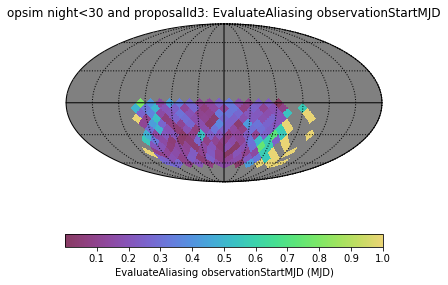

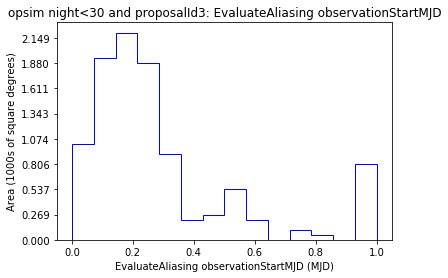

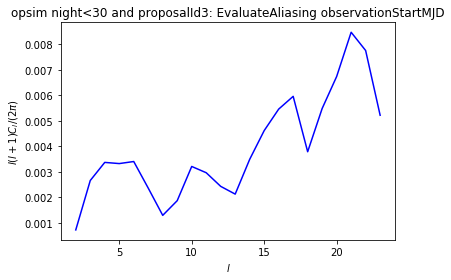

In [11]:
# Set the frequency to (1/3)/day
m = EvaluateAliasing(11.574*10**-6 /3)
Slicer = slicers.HealpixSlicer(nside=8)
Sqlconstraint = 'night<30 and proposalId=3'

mb = metricBundles.MetricBundle(m, Slicer, Sqlconstraint)
BundleDict = {'Aliasing': mb}
group = metricBundles.MetricBundleGroup(BundleDict,opsdb,outDir=outDir, resultsDb=resultsDb)

group.runAll()
group.plotAll(closefigs=False)

Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint night<30 and proposalId=3 for columns ['fieldDec', 'fieldRA', 'night']
Found 18030 visits
Running:  ['Aliasing']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night<30 and proposalId=3" constraint now.
monopole: 4.99319  dipole: lon: 19.1532, lat: -20.9356, amp: 20.0578
Plotting complete.


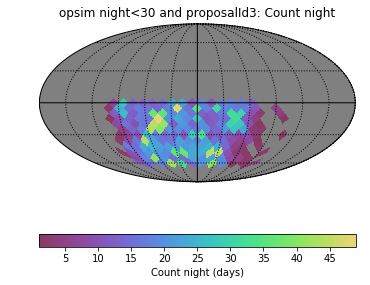

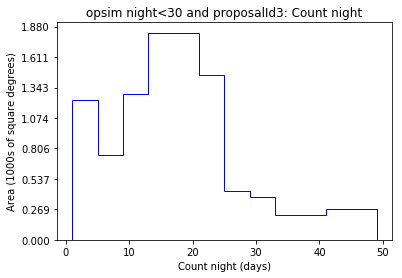

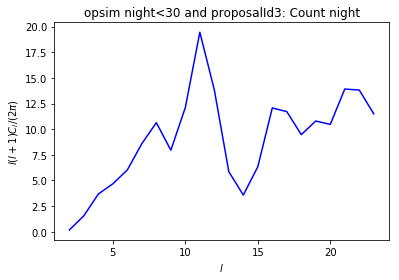

In [10]:
# Some of the ponits above still have high aliasing, which is because of the data are limited for those points.
# Check the amount of the data used obove.
m = metrics.CountMetric('night')
Slicer = slicers.HealpixSlicer(nside=8)
Sqlconstraint = 'night<30 and proposalId=3'

mb = metricBundles.MetricBundle(m, Slicer, Sqlconstraint)
BundleDict = {'Aliasing': mb}
group = metricBundles.MetricBundleGroup(BundleDict,opsdb,outDir=outDir, resultsDb=resultsDb)

group.runAll()
group.plotAll(closefigs=False)

Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint night<365 and proposalId=3 for columns ['observationStartMJD', 'fieldRA', 'fieldDec']
Found 196725 visits
Running:  ['Aliasing']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night<365 and proposalId=3" constraint now.
monopole: 0.094523  dipole: lon: 65.2672, lat: -17.425, amp: 0.010539
Plotting complete.


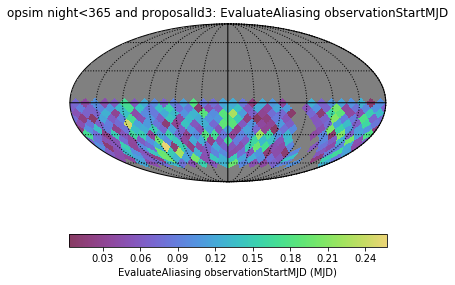

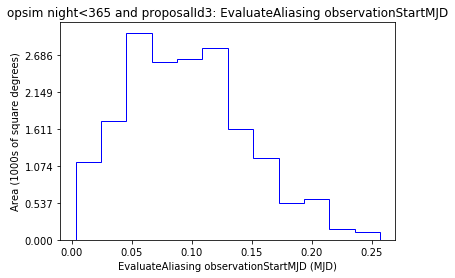

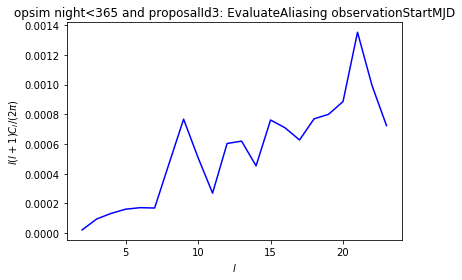

In [12]:
# Extend the scope of the data to 1 year
m = EvaluateAliasing(11.574*10**-6 / 3)
Slicer = slicers.HealpixSlicer(nside=8)
Sqlconstraint = 'night<365 and proposalId=3'

mb = metricBundles.MetricBundle(m, Slicer, Sqlconstraint)
BundleDict = {'Aliasing': mb}
group = metricBundles.MetricBundleGroup(BundleDict,opsdb,outDir=outDir, resultsDb=resultsDb)

group.runAll()
group.plotAll(closefigs=False)

Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint night<365 and proposalId=3 for columns ['observationStartMJD', 'fieldRA', 'fieldDec']
Found 196725 visits
Running:  ['Aliasing']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night<365 and proposalId=3" constraint now.
monopole: 0.707747  dipole: lon: 100.124, lat: -54.2175, amp: 0.119092
Plotting complete.


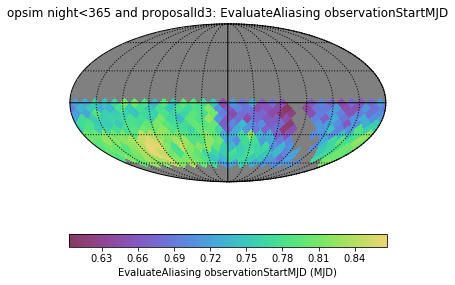

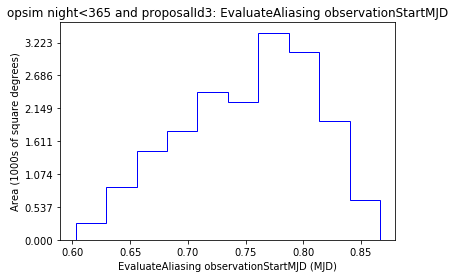

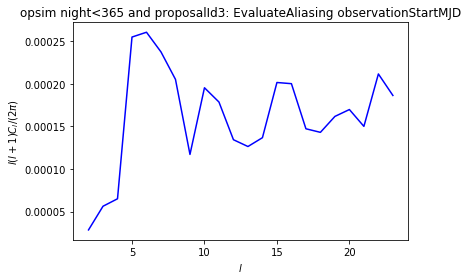

In [7]:
# Extend the scope of the data to 1 year, with a frequency of 1/day.

opsdb = db.OpsimDatabase('baseline2018a.db')

m = EvaluateAliasing(11.574*10**-6)
Slicer = slicers.HealpixSlicer(nside=8)
Sqlconstraint = 'night<365 and proposalId=3'

mb = metricBundles.MetricBundle(m, Slicer, Sqlconstraint)
BundleDict = {'Aliasing': mb}
group = metricBundles.MetricBundleGroup(BundleDict,opsdb,outDir=outDir, resultsDb=resultsDb)

group.runAll()
group.plotAll(closefigs=False)

Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint night<365 for columns ['observationStartMJD', 'fieldRA', 'fieldDec']
Found 220702 visits
Running:  ['Aliasing']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night<365" constraint now.
monopole: 0.281428  dipole: lon: -63.0602, lat: 6.55758, amp: 0.105994
Plotting complete.


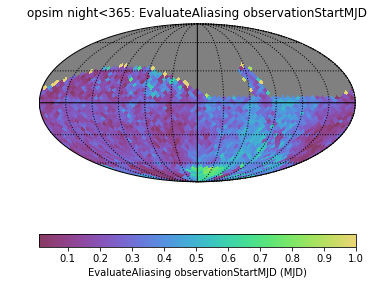

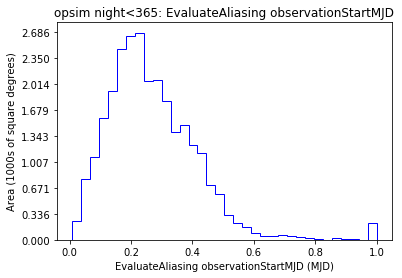

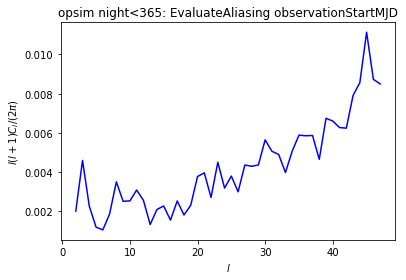

In [13]:
# Use presto_10yrs.db, 3/day

opsdb = db.OpsimDatabase('presto_10yrs.db')

m = EvaluateAliasing(11.574*10**-6 * 3)
Slicer = slicers.HealpixSlicer(nside=16)
Sqlconstraint = 'night<365'

mb = metricBundles.MetricBundle(m, Slicer, Sqlconstraint)
BundleDict = {'Aliasing': mb}
group = metricBundles.MetricBundleGroup(BundleDict,opsdb,outDir=outDir, resultsDb=resultsDb)

group.runAll()
group.plotAll(closefigs=False)

Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint night<365 for columns ['observationStartMJD', 'fieldRA', 'fieldDec']
Found 220702 visits
Running:  ['Aliasing']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night<365" constraint now.
monopole: 0.242369  dipole: lon: -67.0603, lat: -9.47793, amp: 0.0221229
Plotting complete.


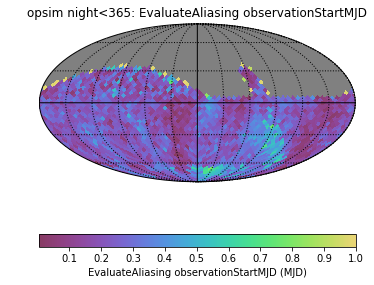

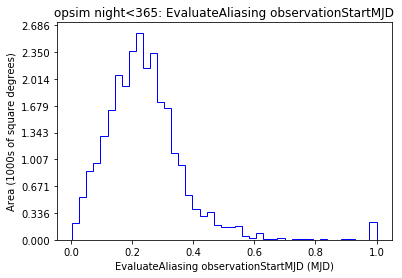

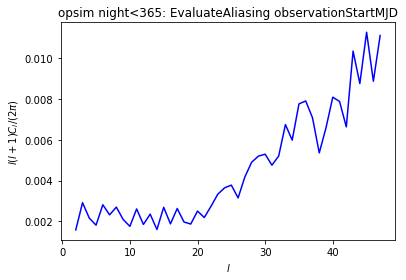

In [14]:
# Use presto_10yrs.db, 4/day

opsdb = db.OpsimDatabase('presto_10yrs.db')

m = EvaluateAliasing(11.574*10**-6 * 4)
Slicer = slicers.HealpixSlicer(nside=16)
Sqlconstraint = 'night<365'

mb = metricBundles.MetricBundle(m, Slicer, Sqlconstraint)
BundleDict = {'Aliasing': mb}
group = metricBundles.MetricBundleGroup(BundleDict,opsdb,outDir=outDir, resultsDb=resultsDb)

group.runAll()
group.plotAll(closefigs=False)